In [250]:
import pandas as pd
import plotly
import numpy as np
import matplotlib.pyplot as plt

In [5]:
atm = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/atmosphere_profile_train.csv')
construction = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/construction_sites.csv')
household = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/household_heating.csv')
industrial = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/industrial_pollution.csv', encoding='cp1252')
sof_topo = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/sofia_topo.csv')
stations = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/stations_data_train.csv')
weather = pandas.read_csv('https://s3.us-east-2.amazonaws.com/datacases/gd-2019/sofia_air_2/weather_lbsf_20161101-20161130_IP_train.csv')

In [13]:
atm.head()

,Date,HGHT(m),TEMP(C)
0,2016-11-01,595,9.6
1,2016-11-01,663,7.6
2,2016-11-01,844,5.4
3,2016-11-01,1047,3.6
4,2016-11-01,1284,1.5


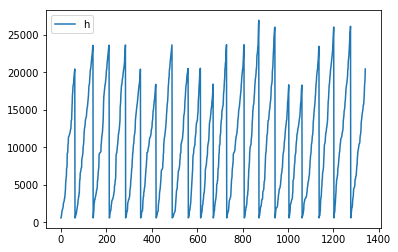

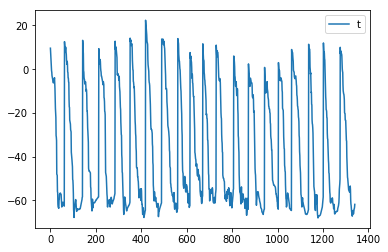

In [356]:
plt.figure(0)
plt.plot(atm['HGHT(m)'])
plt.legend('height')
plt.show()

plt.figure(1)
plt.plot(atm['TEMP(C)'])
plt.legend('temp')
plt.show()

In [38]:
Ht=atm['HGHT(m)']
t=atm['TEMP(C)']

atm['diffs'] = atm.groupby(['Date'])['HGHT(m)'].transform(lambda x: x.diff()) 
atm['diffs1'] = atm.groupby(['Date'])['TEMP(C)'].transform(lambda x: x.diff()) 
atm['delta'] = atm['diffs1']/atm['diffs']

In [39]:
atm1 = atm[(atm['HGHT(m)'] <= 1000)]

In [40]:
atm1

,Date,HGHT(m),TEMP(C),diffs,diffs1,delta
0,2016-11-01,595,9.6,NaN,NaN,NaN
1,2016-11-01,663,7.6,68.0,-2.0,-0.029412
2,2016-11-01,844,5.4,181.0,-2.2,-0.012155
62,2016-11-02,595,12.6,NaN,NaN,NaN
63,2016-11-02,604,11.0,9.0,-1.6,-0.177778
64,2016-11-02,802,9.0,198.0,-2.0,-0.010101
65,2016-11-02,928,8.0,126.0,-1.0,-0.007937
142,2016-11-03,595,13.2,NaN,NaN,NaN
143,2016-11-03,785,11.0,190.0,-2.2,-0.011579
213,2016-11-04,595,9.4,NaN,NaN,NaN


In [44]:
atm2 = atm1[['Date', 'delta']]

In [48]:
atm3 = atm2.dropna().groupby('Date').mean()

In [50]:
atm3.describe()
# results show that we have only stability class E

,delta
count,20.000000
mean,-0.016528
std,0.018661
min,-0.065272
25%,-0.015654
50%,-0.012262
75%,-0.007656
max,0.004164


In [84]:
atm3

,delta
Date,
2016-11-01,-0.020783
2016-11-02,-0.065272
2016-11-03,-0.011579
2016-11-04,-0.063712
2016-11-05,-0.002192
2016-11-06,0.002288
2016-11-07,-0.031620
2016-11-08,-0.002560
2016-11-09,-0.009354


In [163]:
# generate x and y for the calculation of C
# x=y
import numpy as np
xs = [i for i in np.arange(1000,11000,1000)]

In [219]:
# calculate sigmas only for stability class E
sig_y, sig_z = [],[]
for x in xs:
    if x < 1000:
        s_y = 50.5*(x**0.894)
        s_z = 22.8*(x**0.678)-1.3
        sig_y.append(s_y)
        sig_z.append(s_z)
    else:
        s_y = 50.5*(x**0.894)
        s_z = 55.4*(x**0.305)-34.0
        sig_y.append(s_y)
        sig_z.append(s_z)
      

In [220]:
# convert list to dataframe
sigma = pandas.DataFrame({'x': xs})
sigma['sigma_y'] = sig_y
sigma['sigma_z'] = sig_z

In [221]:
sigma

,x,sigma_y,sigma_z
0,1000,24282.387097,421.522428
1,2000,45124.478334,528.760897
2,3000,64839.219714,602.842073
3,4000,83855.781429,661.245301
4,5000,102369.495265,710.210197
5,6000,120492.106215,752.766566
6,7000,138295.811135,790.640513
7,8000,155830.988824,824.919002
8,9000,173134.725034,856.335582
9,10000,190235.418487,885.411147


In [79]:
# import transformed industrial data
industrial2 = pandas.read_csv('C://Users//Kamelia//Downloads//Industrial_Transformed.csv')

In [80]:
industrial2['DailyPM(kg)'] = industrial2['AnnualPM'].apply(lambda x: (x/365)*1000)

In [233]:
industrial2['DailyPM(g/d)'] = industrial2['DailyPM(kg)'].apply(lambda x: x*1000)

In [231]:
#industrial2 = industrial2.drop('DailyPM(g/s)', axis=1)

In [234]:
industrial2

,Latitude,Longitude,DeviceHeight,AnnualPM,DailyPM(kg),DailyPM(g/d)
0,42.737961,23.241339,8.0,0.38,1.041096,1041.095890
1,42.662781,23.388806,15.0,0.03,0.082192,82.191781
2,42.662908,23.388686,15.0,0.20,0.547945,547.945205
3,42.662972,23.388631,15.0,0.96,2.630137,2630.136986
4,42.663089,23.389250,15.0,1.58,4.328767,4328.767123
5,42.732294,23.317436,12.0,1.22,3.342466,3342.465753
6,42.821203,23.368233,10.0,0.60,1.643836,1643.835616
7,42.722767,23.322283,7.0,0.07,0.191781,191.780822
8,42.722942,23.321794,8.0,0.41,1.123288,1123.287671
9,42.658258,23.360486,30.0,0.46,1.260274,1260.273973


In [243]:
C_list = []
for d in range(len(atm3)):
    C = np.zeros((len(industrial2),len(xs)))
    C = pandas.DataFrame(C)   
    C.columns = xs # rename columns
    u = weather.iloc[d,13]*1000/360 # average wind speed per day in meters
    for index, row in industrial2.iterrows():
        Q = industrial2.iloc[index, 5] 
        z =  industrial2.iloc[index, 2]
        for i,x in enumerate(xs):
            #print (index, row[3], x)
            #print ((Q/(2.*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-(x**2.)/(2.*sigma.iloc[i,1]**2.))*(np.exp(-(z**2.)/(2.*sigma.iloc[i,2]**2.)))**2.) 
            #print ((Q/(2*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-x**2/2*sigma.iloc[i,1]**2)*(np.exp(-z**2/2*sigma.iloc[i,2]**2)**2)) 
            C.iloc[index, i] = (Q/(2.*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-(x**2.)/(2.*sigma.iloc[i,1]**2.))*(np.exp(-(z**2.)/(2.*sigma.iloc[i,2]**2.)))**2.
    C = C*1000000 
    C_list.append(C)

In [254]:
# calculate distance to stations
Geo = pd.DataFrame({'ind':industrial2.index,'Lat':industrial2['Latitude'],'Long':industrial2['Longitude']})
Geo.head()

#official measurment
Lat1 = (42.666508,42.680558,42.669797,42.732292)
Long1=(23.400164,23.296786,23.268403,23.310972)
OM = ('STA-BG0052A','STA-BG0050A','STA-BG0073A','STA-BG0040A')

geoloc = pd.DataFrame(
    {'station':OM,'latitude':Lat1, 
     'longitude':Long1})
geoloc.head()
#br = ({'STA-BG0052A',23.400164,42.666508},{'STA-BG0050A',23.296786,42.680558},{'STA-BG0073A',23.268403,42.669797},{'STA-BG0040A',23.310972,42.732292})

def getDist(lat1, long1, lat2, long2):
    earth_radius = 6371
    dLat = np.deg2rad(lat2 - lat1)
    dLon = np.deg2rad(long2 - long1)
    
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(np.deg2rad(lat1)) * np.cos(np.deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arcsin(np.sqrt(a))
    d = earth_radius * c
    
    return(d)

D = np.zeros((len(industrial2),4))
D = pd.DataFrame(D)   
D.columns = OM # rename columns

# calculate distances
for i in range(4):
    for j in range(len(industrial2)):
        D.iloc[j,i] = getDist(geoloc.iloc[i,1], geoloc.iloc[i,2], Geo.iloc[j,1], Geo.iloc[j,2])

D.describe()

,STA-BG0052A,STA-BG0050A,STA-BG0073A,STA-BG0040A
count,71.000000,71.000000,71.000000,71.000000
mean,7.128014,8.157656,10.373476,7.216394
std,4.216813,4.507515,4.512051,4.855791
min,0.969996,4.417998,4.789374,0.527964
25%,3.736352,4.486236,7.065048,3.720894
50%,6.638334,6.163882,8.347505,3.863379
75%,9.255054,10.266172,12.351472,11.995278
max,17.397783,19.664108,22.108298,18.827206


In [322]:
D_list = []
D1 = round(D)
D1 = D1.astype(int)*1000
for d in range(len(atm3)): # 20 days
    D_c = np.zeros((len(industrial2),4))
    D_c = pandas.DataFrame(D_c)   
    D_c.columns = OM # rename columns
    u = weather.iloc[d,13]*1000/360 # average wind speed per day in meters
    for index, row in industrial2.iterrows():
        Q = industrial2.iloc[index, 5] 
        z =  industrial2.iloc[index, 2]
        for i in range(4):
            s_y = 50.5*(D1.iloc[index,i]**0.894)
            s_z = 55.4*(D1.iloc[index,i]**0.305)-34.0
            #print (index, row[3], x)
            #print ((Q/(2.*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-(x**2.)/(2.*sigma.iloc[i,1]**2.))*(np.exp(-(z**2.)/(2.*sigma.iloc[i,2]**2.)))**2.) 
            #print ((Q/(2*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-x**2/2*sigma.iloc[i,1]**2)*(np.exp(-z**2/2*sigma.iloc[i,2]**2)**2)) 
            D_c.iloc[index, i] = (Q/(2.*np.pi*u*s_y*s_z))*np.exp(-(D1.iloc[index,i]**2.)/(2.*s_y**2.))*(np.exp(-(z**2.)/(2.*s_z**2.)))**2.
    D_c = D_c*1000000 
    D_list.append(D_c)

273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
155830.98882449945 824.9190018979264
120492.10621540633 752.7665659925005
24282.387096711296 421.52242807067734
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
24282.387096711296 421.52242807067734
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
24282.387096711296 421.52242807067734
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
24282.387096711296 421.52242807067734
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
305712.1601926241 1046.92779824947
305712.1601926241 1046.92779824947
337673.5917756704 1084.2260699024118
207155.4858329287

45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
138295.8111353906 790.6405127948414
240523.0681187739 962.0072213090026
273348.66910406976 1006.4413375824868
207155.48583292874 912.5303276680481
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
45124.47833440389 528.7608972678258
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
45124.47833440389 528.76089

321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.76089

138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885

138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
102369.49526530558 710.21019

83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101

223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.98607

353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467

223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
138295.8111353906 790.6405127948414
240523.0681187739 962.0072213090026
273348.66910406976 1006.4413375824868
207155.48583292874 912.5303276680481
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
45124.47833440389 528.7608972678258
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
45124.47833440389 528.7608972678258
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
240523.0681187739 962.0072213090026
305712.1601926241 1046.92779824947
289584.0532907169 1027.1245

190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
24282.387096711296 421.52242807067734
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
305712.1601926241 1046.92779824947
305712.1601926241 1046.92779824947
337673.5917756704 1084.2260699024118
207155.48583292874 912.5303276680481
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
24282.387096711296 421.52242807067734
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
24282.387096711296 421.52242807067734
64839.21971436572 602.8420730823625
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543
207155.48583292874 912.5303276680481
155830.988824499

83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.640512

83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.640512

102369.49526530558 710.210196519762
223913.0533060392 937.9860786954893
353518.539415337 1101.8576658406341
384961.46178259916 1135.3612074069656
337673.5917756704 1084.2260699024118
223913.0533060392 937.9860786954893
353518.539415337 1101.8576658406341
384961.46178259916 1135.3612074069656
337673.5917756704 1084.2260699024118
223913.0533060392 937.9860786954893
353518.539415337 1101.8576658406341
384961.46178259916 1135.3612074069656
337673.5917756704 1084.2260699024118
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 7

155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
305712.1601926241 1046.92779824947
305712.1601926241 1046.92779824947
337673.5917756704 1084.2260699024118
207155.48583292874 912.5303276680481
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
24282.387096711296 421.52242807067734
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
24282.387096711296 421.52242807067734
64839.21971436572 602.8420730823625
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543
207155.48583292874 912.5303276680481
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
45124.47833440389 528.7608972678258
83855.7814288308

173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
207155.48583292874 912.5303276680481
273348.66910406976 1006.4413375824868
305712.1601926241 1046.92779824947
207155.48583292874 912.5303276680481
207155.48583292874 912.5303276680481
273348.66910406976 1006.4413375824868
305712.1601926241 1046.92779824947
207155.48583292874 912.5303276680481
273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
155830.98882449945 824.9190018979264
120492.10621540633 752.7665659925005
24282.387096711296 421.52242807067734
155830.98882449945 824.9190018979264
190235.418486874 885.4111467204086
190235.418486874 885.4111467204086
24282.387096711296 421.52242807067734
15583

173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
45124.47833440389 528.7608972678258
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
45124.47833440389 528.7608972678258
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
240523.0681187739 962.0072213090026
305712.1601926241 1046.92779824947
289584.0532907169 1027.1245427271585
321739.9556984054 1065.9371711304955
207155.48583292874 912.5303276680481
173134.72503439258 856.3355818627543
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
173134.72503439258 856.3355818627543
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296

223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086

138295.8111353906 790.6405127948414
102369.49526530558 710.210196519762
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
223913.0533060392 937.9860786954893
321739.9556984054 1065.9371711304955
353518.539415337 1101.8576658406341
273348.66910406976 1006.4413375824868
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937.9860786954893
45124.47833440389 528.7608972678258
190235.418486874 885.4111467204086
223913.0533060392 937.9860786954893
223913.0533060392 937

83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.6405127948414
83855.78142883089 661.2453007309452
138295.8111353906 790.640512

305712.1601926241 1046.92779824947
289584.0532907169 1027.1245427271585
321739.9556984054 1065.9371711304955
207155.48583292874 912.5303276680481
173134.72503439258 856.3355818627543
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
173134.72503439258 856.3355818627543
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
173134.72503439258 856.3355818627543
120492.10621540633 752.7665659925005
155830.98882449945 824.9190018979264
24282.387096711296 421.52242807067734
273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543
102369.49526530558 710.210196519762
273348.66910406976 1006.4413375824868
155830.98882449945 824.9190018979264
173134.72503439258 856.3355818627543

In [329]:
F = np.zeros((len(atm3),4))
F = pandas.DataFrame(F)   
F.columns = OM # rename columns
for i in range(len(atm3)): # 20 days
    F.iloc[i,0] = D_list[i]['STA-BG0052A'].sum()
    F.iloc[i,1] = D_list[i]['STA-BG0050A'].sum()
    F.iloc[i,2] = D_list[i]['STA-BG0073A'].sum()
    F.iloc[i,3] = D_list[i]['STA-BG0040A'].sum()

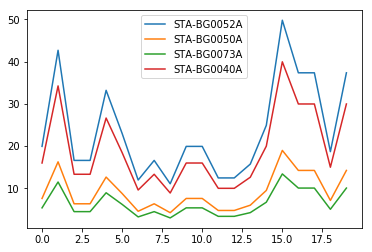

<Figure size 432x288 with 0 Axes>

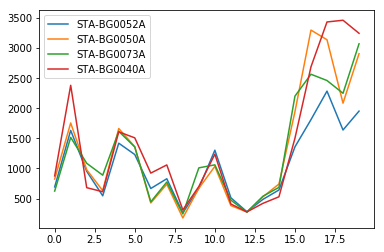

In [348]:
# our estimations
plt.figure(0)
plt.plot(F)
plt.legend(F.columns)
plt.show()

# official measurements
plt.figure(1)
stations.plot()
plt.show()

In [349]:
from sklearn import linear_model
# define predictors 
expl = pd.DataFrame(F, columns=['STA-BG0052A'])

# define target
target = pd.DataFrame(stations, columns=['STA-BG0052A'])

In [352]:
# fit model
lm = linear_model.LinearRegression()
model = lm.fit(expl,target)

In [353]:
# see R2
print (lm.score(expl,target))

0.5943948681421616

In [355]:
# see intercept and coefficient
print (lm.intercept_)
print(lm.coef_)

[114.2032711]
[[39.58708459]]


In [363]:
predictions = lm.predict(expl)
predictions

array([[ 902.48970199],
       [1803.38848015],
       [ 771.10863017],
       [ 771.10863017],
       [1428.01398925],
       [1023.76453751],
       [ 587.17512963],
       [ 771.10863017],
       [ 552.14017715],
       [ 902.48970199],
       [ 902.48970199],
       [ 606.8822904 ],
       [ 606.8822904 ],
       [ 736.5346639 ],
       [1099.56130971],
       [2084.91934832],
       [1592.24032902],
       [1592.24032902],
       [ 853.22180006],
       [1592.24032902]])

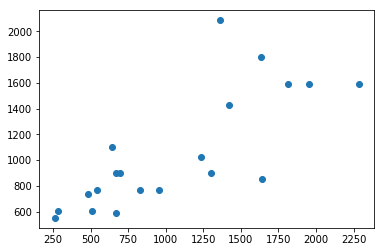

In [364]:
plt.scatter(target,predictions)

In [255]:
# save to csv
C_list[0].to_csv('C1.csv')

In [381]:
# import test sets
weather_t = pandas.read_csv('C://Users//Kamelia//Downloads//weather_lbsf_20161101-20161130_IP_test.csv')
stations_t = pandas.read_csv('C://Users//Kamelia//Downloads//stations_data_test.csv')

In [373]:
# calculate next 5 points
D_test = []
#D1 = round(D)
#D1 = D1.astype(int)*1000
for d in range(len(weather_t)): # 5 days
    D_t = np.zeros((len(industrial2),4))
    D_t = pandas.DataFrame(D_t)   
    D_t.columns = OM # rename columns
    u = weather_t.iloc[d,13]*1000/360 # average wind speed per day in meters
    for index, row in industrial2.iterrows():
        Q = industrial2.iloc[index, 5] 
        z =  industrial2.iloc[index, 2]
        for i in range(4):
            s_y = 50.5*(D1.iloc[index,i]**0.894)
            s_z = 55.4*(D1.iloc[index,i]**0.305)-34.0
            #print (index, row[3], x)
            #print ((Q/(2.*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-(x**2.)/(2.*sigma.iloc[i,1]**2.))*(np.exp(-(z**2.)/(2.*sigma.iloc[i,2]**2.)))**2.) 
            #print ((Q/(2*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-x**2/2*sigma.iloc[i,1]**2)*(np.exp(-z**2/2*sigma.iloc[i,2]**2)**2)) 
            D_t.iloc[index, i] = (Q/(2.*np.pi*u*s_y*s_z))*np.exp(-(D1.iloc[index,i]**2.)/(2.*s_y**2.))*(np.exp(-(z**2.)/(2.*s_z**2.)))**2.
    D_t = D_t*1000000 
    D_test.append(D_t)

In [377]:
# final results from test set
F_t = np.zeros((len(weather_t),4))
F_t = pandas.DataFrame(F_t)   
F_t.columns = OM # rename columns
for i in range(len(weather_t)): # 5 days
    F_t.iloc[i,0] = D_test[i]['STA-BG0052A'].sum()
    F_t.iloc[i,1] = D_test[i]['STA-BG0050A'].sum()
    F_t.iloc[i,2] = D_test[i]['STA-BG0073A'].sum()
    F_t.iloc[i,3] = D_test[i]['STA-BG0040A'].sum()

In [388]:
F_t

,STA-BG0052A,STA-BG0050A,STA-BG0073A,STA-BG0040A
0,16.593931,6.321122,4.464252,13.313054
1,24.890897,9.481683,6.696379,19.969582
2,33.187862,12.642244,8.928505,26.626109
3,42.670109,16.254314,11.479506,34.233568
4,42.670109,16.254314,11.479506,34.233568


In [393]:
# export csv
D_test[0].to_csv('industrial_polluters_test.csv') # predictions for each polluter on day 21
F_t.to_csv('final_t.csv') # predictions for official stations

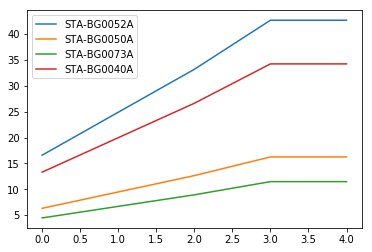

<Figure size 432x288 with 0 Axes>

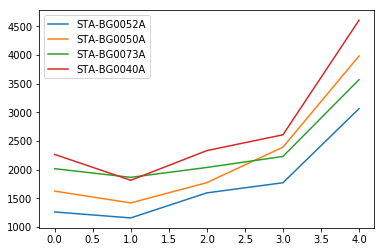

In [382]:
# our estimations for the test set
plt.figure(0)
plt.plot(F_t)
plt.legend(F_t.columns)
plt.show()

# official measurements from the test set
plt.figure(1)
stations_t.plot()
plt.show()

In [386]:
lm.predict(pd.DataFrame(F_t, columns=['STA-BG0052A']))

array([[ 771.10863017],
       [1099.56130971],
       [1428.01398925],
       [1803.38848015],
       [1803.38848015]])

In [387]:
stations_t['STA-BG0052A']

0    1259.52
1    1155.36
2    1592.16
3    1768.80
4    3061.44
Name: STA-BG0052A, dtype: float64

In [394]:
C1_list = []
for d in range(len(weather_t)):
    C = np.zeros((len(industrial2),len(xs)))
    C = pandas.DataFrame(C)   
    C.columns = xs # rename columns
    u = weather_t.iloc[d,13]*1000/360 # average wind speed per day in meters
    for index, row in industrial2.iterrows():
        Q = industrial2.iloc[index, 5] 
        z =  industrial2.iloc[index, 2]
        for i,x in enumerate(xs):
            #print (index, row[3], x)
            #print ((Q/(2.*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-(x**2.)/(2.*sigma.iloc[i,1]**2.))*(np.exp(-(z**2.)/(2.*sigma.iloc[i,2]**2.)))**2.) 
            #print ((Q/(2*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-x**2/2*sigma.iloc[i,1]**2)*(np.exp(-z**2/2*sigma.iloc[i,2]**2)**2)) 
            C.iloc[index, i] = (Q/(2.*np.pi*u*sigma.iloc[i, 1]*sigma.iloc[i,2]))*np.exp(-(x**2.)/(2.*sigma.iloc[i,1]**2.))*(np.exp(-(z**2.)/(2.*sigma.iloc[i,2]**2.)))**2.
    C = C*1000000 
    C1_list.append(C)

In [397]:
# export to csv
C1_list[0].to_csv('C1_t.csv')